In [10]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [11]:
import numpy as np
import pandas as pd

In [12]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [13]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [14]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [15]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [16]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [17]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [18]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [151]:
#query to find latest date
latestDate = (session.query(Measurement.date)
                     .order_by(Measurement.date.desc())
                     .first())
print(latestDate )
#extract string from query object
latestDate = list(np.ravel(latestDate))[0]
print(latestDate )
#convert date string to datetime object
latestDate = dt.datetime.strptime(latestDate, '%Y-%m-%d')
print(latestDate)

#extract year, month, and day as integers
latestYear = int(dt.datetime.strftime(latestDate, '%Y'))
print(latestYear)
latestMonth = int(dt.datetime.strftime(latestDate, '%m'))
print(latestMonth)
latestDay = int(dt.datetime.strftime(latestDate, '%d'))
print(latestDay)



('2017-08-23',)
2017-08-23
2017-08-23 00:00:00
2017
8
23


In [41]:
# Calculate the date 1 year ago from the last data point in the database
yearago = dt.date(latestYear, latestMonth, latestDay) - dt.timedelta(days=365)
yearago

datetime.date(2016, 8, 23)

In [42]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
resultData = (session.query(Measurement.date, Measurement.prcp)
                  .filter(Measurement.date > yearago)
                  .order_by(Measurement.date)
                  .all())
resultData

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [44]:
# Save the query results as a Pandas DataFrame and set the index to the date column
result_df = pd.DataFrame(resultData)
result_df = result_df.set_index('date')
# Sort the dataframe by date
result_df = result_df.sort_index(ascending=True)
result_df.head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


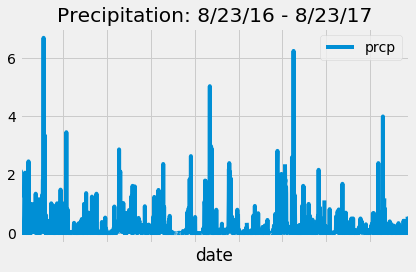

In [56]:
# Use Pandas Plotting with Matplotlib to plot the data
result_df.plot()

#formatting and titles
plt.title("Precipitation: 8/23/16 - 8/23/17")

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.legend(loc="best")
plt.tight_layout()
# Save the Figure
plt.savefig("Output_Image/Precipitationbar.png")
# Show the Figure
plt.show()

In [57]:
# Use Pandas to calcualte the summary statistics for the precipitation data
result_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [59]:
# Design a query to show how many stations are available in this dataset?
station_Count = session.query(Station).count()
print(station_Count)

9


In [83]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
activeStation=(session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all())
activeStation

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [103]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

#set the most active station
stationID = activeStation[0][0]

#query for most active station name
stationName = session.query(Station.name).filter_by(station = stationID)
print("-------------------------------------------------------")
print(f"Most active staion ID is {stationID}:Name is {stationName[0][0]}")


#query for highest temperature for most active station
highest_temp = session.query(Measurement.tobs).filter(Measurement.station == stationID).order_by(Measurement.tobs.desc()).first()
highest_temp = highest_temp[0]
print("--------------------------------------------------------")
print(f"The Highest temperature recorded there is {highest_temp} degrees Farenheit.")

#query for lowest temperature for most active station
lowest_temp = session.query(Measurement.tobs).filter(Measurement.station == stationID).order_by(Measurement.tobs.asc()).first()
lowest_temp = lowest_temp[0]
print("--------------------------------------------------------")
print(f"The Lowest temperature recorded there is {lowest_temp} degrees Farenheit.")

#query for average temperature for most active station
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == stationID).first()
avg_temp = avg_temp[0]
print("--------------------------------------------------------")
print(f"The Average temperature recorded there is {avg_temp} degrees Farenheit.")



-------------------------------------------------------
Most active staion ID is USC00519281:Name is WAIHEE 837.5, HI US
--------------------------------------------------------
The Highest temperature recorded there is 85.0 degrees Farenheit.
--------------------------------------------------------
The Lowest temperature recorded there is 54.0 degrees Farenheit.
--------------------------------------------------------
The Average temperature recorded there is 71.66378066378067 degrees Farenheit.


In [110]:
# Choose the station with the highest number of temperature observations.
#query for the last year of temperature data
temp_data = (session.query(Measurement.date, Measurement.tobs)
                   .filter(Measurement.date > yearago)
                   .filter(Measurement.station == stationID)
                   .order_by(Measurement.date)
                   .all())

#convert query object to data frame
temp_df = pd.DataFrame(temp_data)
temp_df = temp_df.set_index('date')

#sory by date
temp_df = temp_df.sort_index(ascending=True)
temp_df.head()


,tobs
date,
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0


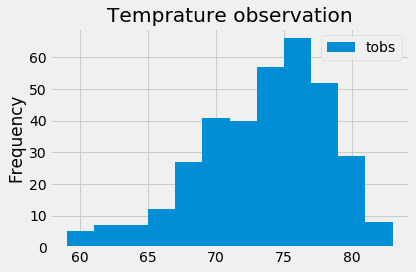

In [118]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_df.plot(kind='hist', bins=12)

#formatting and titles
plt.title("Temprature observation")
plt.legend(loc="best")
plt.tight_layout()
# Save the Figure
plt.savefig("Output_Image/TempHistogram.png")
# Show the Figure
plt.show()

In [113]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [115]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip='2012-02-28 to 2012-03-05'
tripStartDate = '2012-02-28'
tripEndDate = '2012-03-05'

#calculate the tmin, tavg, and tmax 
trip_temps = calc_temps(tripStartDate, tripEndDate)

trip_temps

[(62.0, 69.57142857142857, 74.0)]

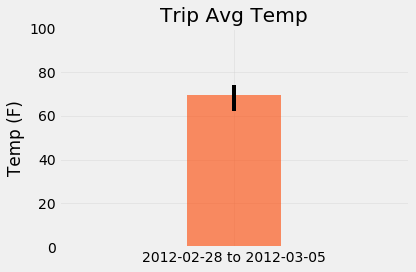

In [168]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
min_trip_temp = trip_temps[0][0]
avg_trip_temp = trip_temps[0][1]
max_trip_temp = trip_temps[0][2]

min_err = avg_trip_temp - min_trip_temp
max_err = max_trip_temp - avg_trip_temp
errorBars = np.array([[min_err], [max_err]])

plt.bar(trip, avg_trip_temp, yerr=errorBars, color = 'orangered', alpha = .6)
plt.ylim(0, 100)
plt.xlim(-1.5, 1.5)
plt.title('Trip Avg Temp')
plt.ylabel('Temp (F)')
plt.grid(alpha=.3)
plt.tight_layout()
# Save the Figure
plt.savefig("Output_Image/ErrorBar.png")
# Show the Figure
plt.show()

In [123]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

station_rainfall = (session.query(Station.station,Station.name,func.sum(Measurement.prcp),Station.latitude,Station.longitude,Station.elevation)
                   .filter(Station.station == Measurement.station)
                   .filter(Measurement.date >= tripStartDate)
                   .filter(Measurement.date <= tripEndDate)
                   .group_by(Station.station)
                   .order_by(func.sum(Measurement.prcp).desc())
                   .all())

#convert query object to data frame
station_df = pd.DataFrame(np.array(station_rainfall))

#rename columns
station_df = station_df.rename(columns={0: "Station", 1: "Location", 
                                                    2: "Total Precipitation", 3: "Latitude", 
                                                    4: "Longitude", 5: "Elevation"})

station_df


,Station,Location,Total Precipitation,Latitude,Longitude,Elevation
0,USC00519281,"WAIHEE 837.5, HI US",11.08,21.45167,-157.84888999999998,32.9
1,USC00516128,"MANOA LYON ARBO 785.2, HI US",10.32,21.3331,-157.8025,152.4
2,USC00513117,"KANEOHE 838.1, HI US",5.79,21.4234,-157.8015,14.6
3,USC00518838,"UPPER WAHIAWA 874.3, HI US",3.8400000000000003,21.4992,-158.0111,306.6
4,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2.92,21.33556,-157.71139,19.5
5,USC00519397,"WAIKIKI 717.2, HI US",1.1800000000000002,21.2716,-157.8168,3.0
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",0.76,21.3152,-157.9992,0.9
7,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",0.03,21.5213,-157.8374,7.0
8,USC00517948,"PEARL CITY, HI US",0.0,21.3934,-157.9751,11.9


## Optional Challenge Assignment

In [124]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [170]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_Date = '2012-02-05'
end_Date = '2012-03-28'

# Use the start and end date to create a range of dates
startN = int(start_Date[-2:])
endN = int(end_Date[-2:])
trip_range = endN - startN + 1

# Stip off the year and save a list of %m-%d strings
#start date as datetime object
start_Date = dt.datetime.strptime(start_Date, '%Y-%m-%d')
#list dates (MM-DD) of trip
dateList = [dt.datetime.strftime(start_Date + dt.timedelta(days = x), '%m-%d') 
            for x in range(0, trip_range)]

# Loop through the list of %m-%d strings and calculate the normals for each date
trip_Normals = [daily_normals(date) for date in dateList]

trip_Normals

[[(59.0, 69.6842105263158, 80.0)],
 [(58.0, 70.38983050847457, 77.0)],
 [(60.0, 69.0, 77.0)],
 [(56.0, 66.75438596491227, 74.0)],
 [(57.0, 67.58928571428571, 75.0)],
 [(56.0, 68.41666666666667, 76.0)],
 [(61.0, 69.25, 79.0)],
 [(60.0, 69.15789473684211, 78.0)],
 [(58.0, 70.36206896551724, 80.0)],
 [(62.0, 70.89473684210526, 79.0)],
 [(56.0, 70.28813559322033, 79.0)],
 [(59.0, 70.48214285714286, 76.0)],
 [(62.0, 70.47272727272727, 77.0)],
 [(63.0, 70.79629629629629, 77.0)],
 [(60.0, 69.33962264150944, 77.0)],
 [(63.0, 70.14035087719299, 76.0)],
 [(63.0, 69.79629629629629, 76.0)],
 [(60.0, 70.15789473684211, 83.0)],
 [(62.0, 70.35593220338983, 81.0)],
 [(61.0, 68.56666666666666, 76.0)],
 [(61.0, 68.59649122807018, 76.0)],
 [(62.0, 69.89285714285714, 78.0)],
 [(58.0, 69.98148148148148, 77.0)],
 [(65.0, 70.65517241379311, 80.0)]]

In [162]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
#extract normals into a list of lists
trip_Normals = [np.array(normal[0]) for normal in tripNormals]
norm_df=pd.DataFrame(trip_Normals)
#add Column
norm_df["Date"] = dateList
#set index and rename columns
norm_df = norm_df.set_index("Date")
norm_df = norm_df.rename(columns={0: "Low Temp", 1: "Avg Temp", 2: "High Temp"})

norm_df.head()


,Low Temp,Avg Temp,High Temp
Date,,,
02-05,59.0,69.684211,80.0
02-06,58.0,70.389831,77.0
02-07,60.0,69.000000,77.0
02-08,56.0,66.754386,74.0
02-09,57.0,67.589286,75.0


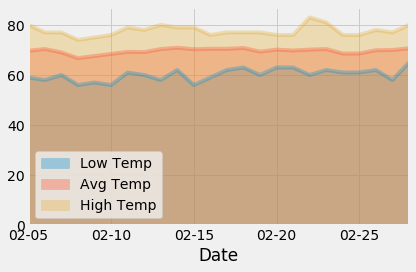

In [167]:
# Plot the daily normals as an area plot with `stacked=False`
norm_df.plot.area(stacked=False, alpha=.333)
#formatting and titles

plt.legend(loc="best")
plt.tight_layout()
# Save the Figure
plt.savefig("Output_Image/Area_stacked.png")
# Show the Figure
plt.show()